<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/%D0%9F%D0%A0_1_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1.1. Анализ больших данных с помощью DASK

ФИО: Гадильшина Валентина Евгеньевна

Группа: БД-231м

**mgpu_z_10** - №5. UK Property Price official data 1995-202304.zip.

*Так как из-за большого объема файла не хватило оперативной памяти, то я сделала случайную выборку 35% датасета и сохранила новый файл sampled_data.csv на гугл диске.*

**Задание.**

`1.1.1.` Настроить среду и рабочий каталог.

`1.1.2.` Загрузить данные.

`1.1.3.` Проверить качество данных (например, отсутствующие значения и выбросы).

`1.1.4.` Удалить столбцы (множество пропусков в значениях, бесполезные столбцы для анализа).

`1.1.1.` **Настроить среду и рабочий каталог.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

 Parking_Violations_Issued_Fiscal_Year_2016.csv  'UK_Property Price_official data_1995_2023.csv'
 sampled_data.csv


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data

/content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data


In [ ]:
!pip install "dask[complete]"

In [ ]:
# import libraries
import sys
import os

## import dask libraries
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# import libraries
import pandas as pd

In [ ]:
cwd = os.getcwd()

# print
print('', sys.executable)
print('', cwd)

 /usr/bin/python3
 /content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data


`1.1.2.` **Загрузить данные.**

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
## read data using DataFrame API
df = dd.read_csv('UK_Property Price_official data_1995_2023.csv', dtype={'31': 'object', 'Unnamed: 8': 'object'})
sampled_df = df.sample(frac=0.35) # Get 35% of the data
len(sampled_df)
sampled_df

,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,Unnamed: 8,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES.1,MILTON KEYNES.2,A,A.1
npartitions=77,,,,,,,,,,,,,,,,
,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
sampled_df.to_csv('sampled_data.csv', index=False, single_file=True)

# Check if the file is written successfully
file_path = 'sampled_data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

 Parking_Violations_Issued_Fiscal_Year_2016.csv  'UK_Property Price_official data_1995_2023.csv'
 sampled_data.csv


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data

/content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data


In [ ]:
!pip install "dask[complete]"

In [ ]:
cwd = os.getcwd()

# print
print('', sys.executable)
print('', cwd)

 /usr/bin/python3
 /content/drive/MyDrive/Colab Notebooks GadilshinaVE/BDP/data


In [ ]:
## read data using DataFrame API
df = dd.read_csv('sampled_data.csv', dtype={'Unnamed: 8': 'object'})
df

,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,Unnamed: 8,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES.1,MILTON KEYNES.2,A,A.1
npartitions=22,,,,,,,,,,,,,,,,
,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


`1.1.3.` **Проверить качество данных (например, отсутствующие значения и выбросы).**

In [ ]:
# count missing values #я еще не выполнял задачу
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
1995-07-07 00:00                          int64
{F887F88E-7D15-4415-804E-52EAC2F10958}      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [ ]:
# calculate percent missing values
mysize = df.index.size
missing_count = ((missing_values / mysize) * 100)
missing_count

Dask Series Structure:
npartitions=1
1995-07-07 00:00                          float64
{F887F88E-7D15-4415-804E-52EAC2F10958}        ...
dtype: float64
Dask Name: mul, 9 graph layers

Обратите внимание на то, что:

- созданный объект `dask` представляет собой серию, и вычисление еще не завершено.

- `df.index.size` — это объект `dask` `dask.dataframe.core.Scalar`. Вы не можете получить доступ к его значению/длине напрямую, как если бы вы это делали со списком (например, `len()`). Это противоречило бы всей идее `dask` (т.е. прочитать весь набор данных).

- `# tasks` количество задач увеличилось, так как были добавлены `2` задачи (т.е. деление и умножение).

-  `data type` изменен с `int64` на `float64`. Dask автоматически преобразовал его, если тип данных на выходе  не совпадает с входным после разделения.

In [ ]:
# запуск вычисления, используя метод подсчета
with ProgressBar():
  missing_count_percent = missing_count.compute()
missing_count_percent

[########################################] | 100% Completed | 89.60 s


{F887F88E-7D15-4415-804E-52EAC2F10958}     0.000000
70000                                      0.000000
1995-07-07 00:00                           0.000000
MK15 9HP                                   0.162064
D                                          0.000000
N                                          0.000000
F                                          0.000000
31                                         0.015056
Unnamed: 8                                88.238893
ALDRICH DRIVE                              1.586391
WILLEN                                    35.664782
MILTON KEYNES                              0.000000
MILTON KEYNES.1                            0.000000
MILTON KEYNES.2                            0.000000
A                                          0.000000
A.1                                        0.000000
dtype: float64

Обратите внимание на то, что:

- метод `.compute()` необходим для запуска действий, встроенных в каждый узел группы обеспечения доступности баз данных.

- Результаты метода вычислений сохраняются в серии `Pandas`.

- `ProgressBar()` — это оболочка для отслеживания запущенных задач. Он показывает завершенную работу.

Видим, что не все столбцы являются неполными, и нам следует их удалить.

`1.1.4.` **Удалить столбцы (пропуски в значениях, бесполезные столбцы для анализа).**

In [ ]:
# операция фильтрации разреженных столбцов (более 60% пропущенных значений) и сохраняем оставшиеся
columns_to_drop = missing_count_percent[missing_count_percent > 60].index
print(columns_to_drop)

# drop sparse columns
with ProgressBar():
    #df_dropped = df.drop(columns_to_drop, axis=1).persist()
    df_dropped = df.drop(columns_to_drop, axis=1).compute()

Index(['Unnamed: 8'], dtype='object')
[########################################] | 100% Completed | 61.99 s


Обратите внимание на то, что:

- использовать `Pandas Series` для удаления столбцов в `Dask DataFrame`, поскольку каждый раздел является `Pandas DataFrame`.

- В случае, если серия доступна для всех потоков, в кластере она будет сериализована и широковещательно передана всем рабочим узлам.

- Метод `.persist()` позволяет хранить в памяти промежуточные вычисления, чтобы их можно было использовать повторно.

# Практическая работа 2.2. Визуализация ориентированных ациклических графов (DAG)

- `DASK` использует библиотеку `Graviz` для создания визуального представления групп `DAG`, созданных планировщиком.

- и спользуйте метод `.visualize()` для проверки групп `DAG DataFrames`, `Series`, `Bag` и массивов.

Для упрощения будем использовать объект `Dask Delayed` вместо `DataFrames`, поскольку они становятся довольно большими и их трудно визуализировать.

- `Delayed` — это конструктор, который позволяет обертывать функции и создавать объекты `Dask Delayed`, эквивалентные узлу в `DAG`. Объединяя захваченные объекты, создаем группу доступа к данным.

Ниже приведены два примера: в первом  `DAG` только с одним узлом и зависимостями, а во втором  - `DAG` с несколькими узлами и зависимостями.

**Задание.**

`1.2.1.` Визуализировать `DAG` с одним узлом и зависимостями.

`1.2.1.` Визуализировать `DAG` с более чем одним узлом и зависимостями.



`1.1.1.` **Визуализировать `DAG` с одним узлом и зависимостями.**

In [ ]:
# import library
import dask.delayed as delayed

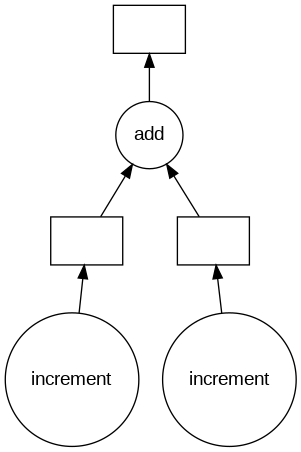

In [ ]:
def increment(i):
    return i + 1

def add(x, y):
    return x + y

# функции переноса внутри отложенного объекта и цепочки
x = delayed(increment)(1)
y = delayed(increment)(2)
z = delayed(add)(x, y)

# visualize the DAG
z.visualize()

In [ ]:
# show the result
z.compute()

5

Обратите внимание на то, что:

- Чтобы построить узел, в функцию передали захваченный объект, а затем передали аргументы этой функции. Можно использовать декораторы.

- Круги указывают на функцию и вычисления, а квадраты — промежуточный или конечный результат.

- Входящие стрелки представляют зависимости. Функция `increment` не имеет никаких зависимостей, а функция `add` — две. Таким образом, функция `add`  должна ждать, пока не будут вычислены объекты `x` и `y`.

- Функции без зависимостей могут вычисляться независимо, и каждой из них можно назначить `workera`.

- Используйте метод `.visualize()` на последнем узле с зависимостями.

- `Dask` не расчитывает `DAG`. Используйте метод `.compute()` на последнем узле, чтобы увидеть результат.

`1.2.2.` **Визуализировать `DAG` с более чем одним узлом и зависимостями.**

построить более сложную группу `DAG` с двумя уровнями:

- `Layer1` создается путем циклического перебора списка данных  в ​`​dask` . Этот слой объединяет ранее созданное приращение функции со значениями в списке, а затем использует встроенное суммирование функции для объединения результатов;

- `Layer2` построен циклически для каждого объекта, созданного в `Layer1`.

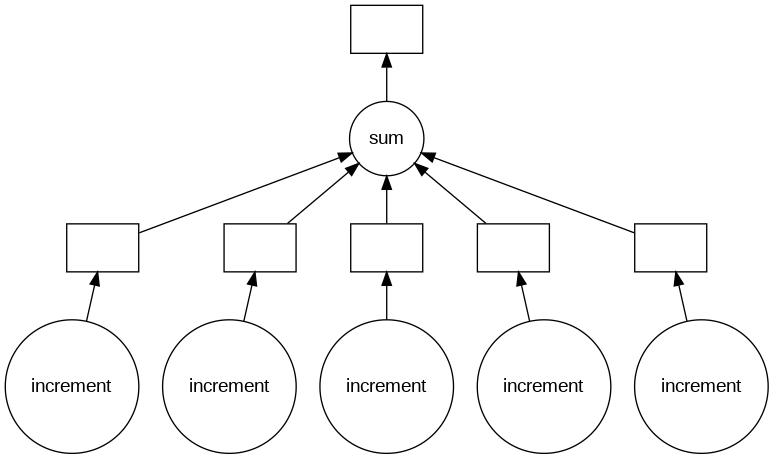

In [ ]:
data = [1, 2, 3, 4, 5]

# compile first layer and visualize
layer1 = [delayed(increment)(i) for i in data]
total1 = delayed(sum)(layer1)
total1.visualize()

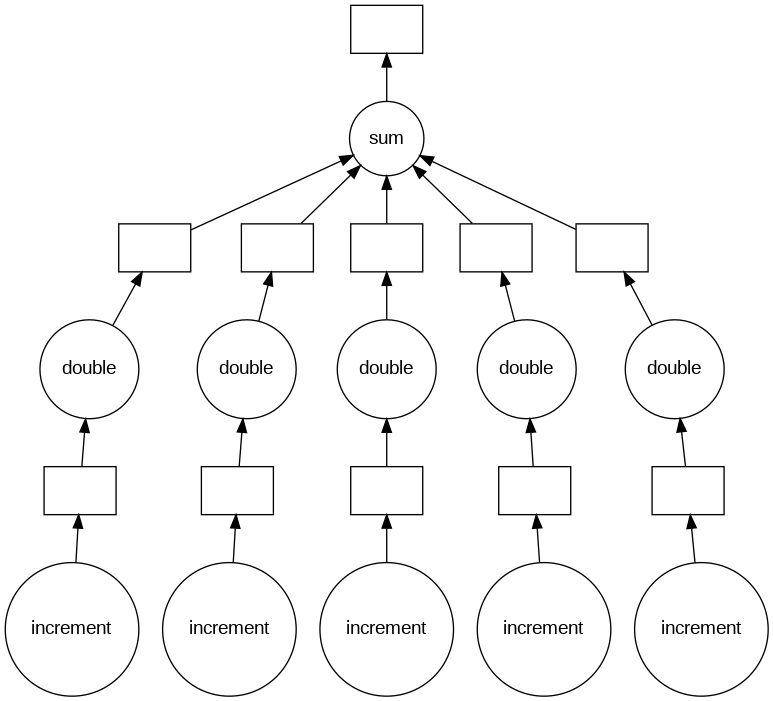

In [ ]:
def double(x):
    return x * 2

# compile second layer and visualize
layer2 = [delayed(double)(j) for j in layer1]
total2 = delayed(sum)(layer2)#.persist()
total2.visualize()

In [ ]:
z = total2.compute()
z

40

Обратите внимание на то, что:

- построение через использование функции,

- используем `.persist()`, и результат будет представлен на графике в виде прямоугольника.

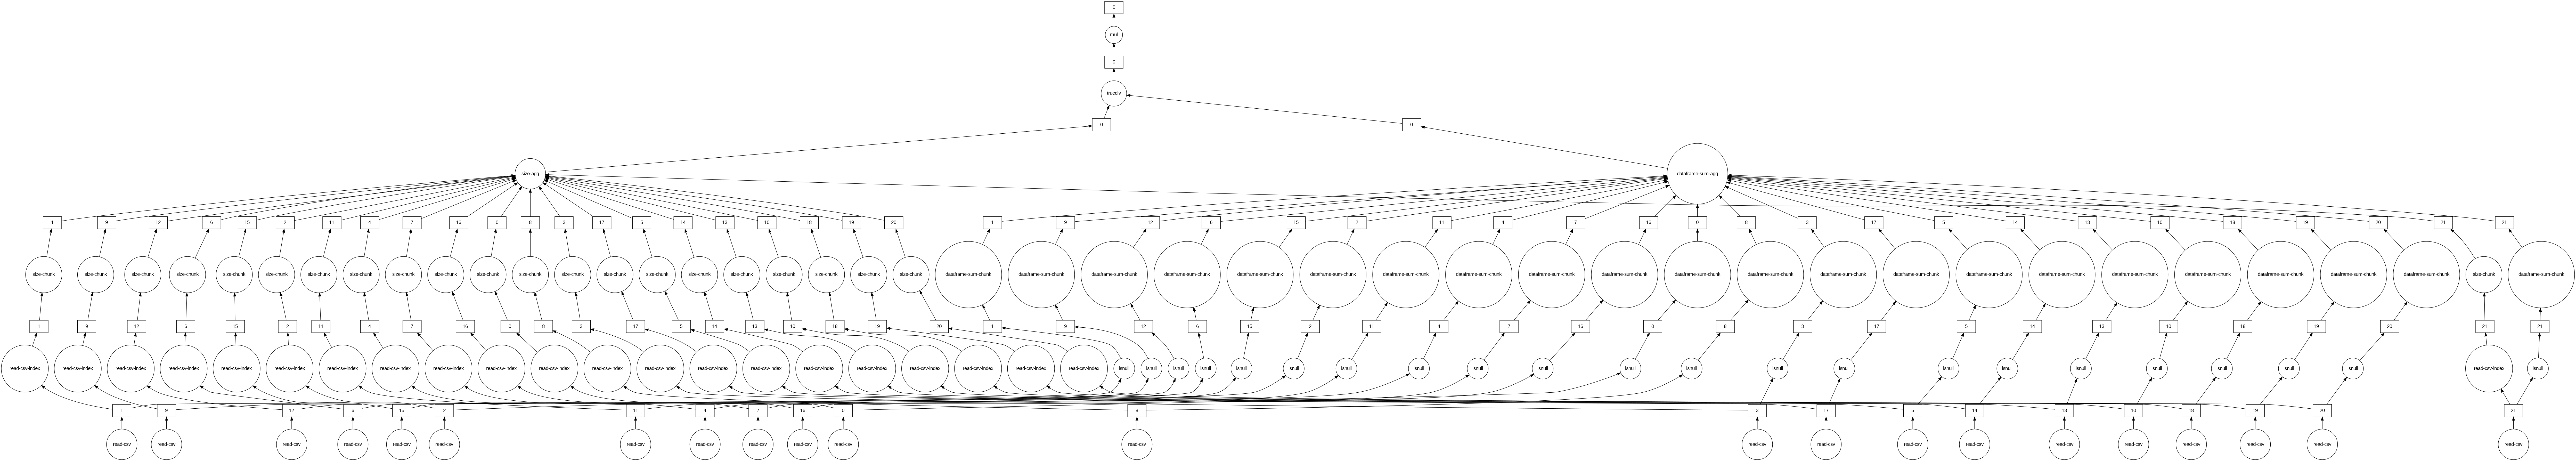

In [ ]:
# visualize DAGs built from the DataFrame
missing_count.visualize()